[volver](../README.md)

# K-Means Clustering

Es un algoritmo de agrupamiento que particiona los datos en k grupos en los que cada dato pertenece al grupo con la media más cercana.
Puede ser útil para identificar patrones en los datos meteorológicos sin etiquetas previas.


## Carga del Conjunto de Datos:

* Se carga el conjunto de datos weatherAUS.csv utilizando pandas.

## Preprocesamiento de Datos:

* Se seleccionan columnas numéricas relevantes: MinTemp, MaxTemp, Rainfall, Humidity3pm, Pressure9am, WindSpeed9am, y WindSpeed3pm.
* Se imputan los valores faltantes con la media de cada columna.
* Se estandarizan los datos para que tengan media 0 y desviación estándar 1 utilizando StandardScaler.

## Aplicación de K-Means Clustering:

* Se aplica el algoritmo K-Means con 3 clusters y se ajusta a los datos estandarizados.
* Se añaden las etiquetas de cluster al DataFrame original.



In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos WeatherAUS
data = pd.read_csv('../dataset/weatherAUS.csv')

# Preprocesamiento de Datos
# Seleccionar algunas columnas numéricas para simplificar
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure9am', 'WindSpeed9am', 'WindSpeed3pm']
data = data[selected_columns]

# Imputar valores faltantes con la media de la columna
data = data.fillna(data.mean())

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
data['Cluster'] = labels




## Visualización de los Clusters:

* Se crean dos visualizaciones de los clusters utilizando matplotlib:
    * La primera visualiza cómo se agrupan los datos en función de MinTemp y MaxTemp.
    * La segunda visualiza cómo se agrupan los datos en función de WindSpeed9am y WindSpeed3pm.

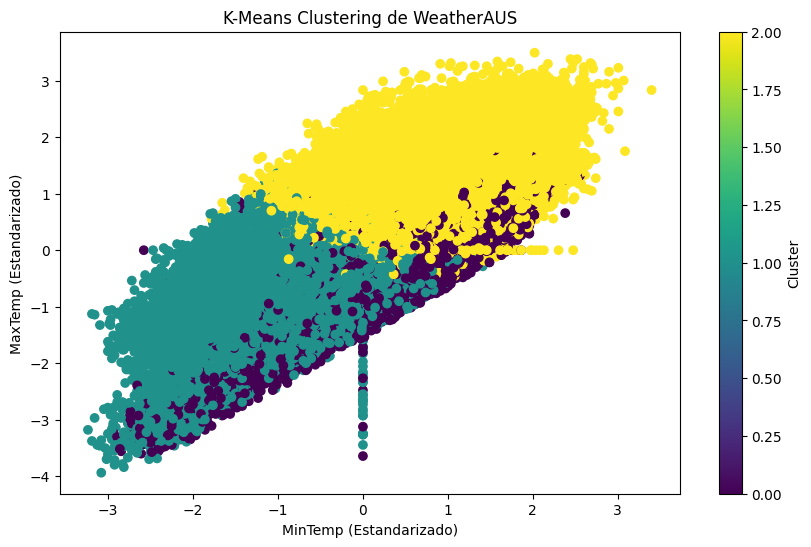

In [5]:
# Visualización de los Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering de WeatherAUS')
plt.xlabel('MinTemp (Estandarizado)')
plt.ylabel('MaxTemp (Estandarizado)')
plt.colorbar(label='Cluster')
plt.show()

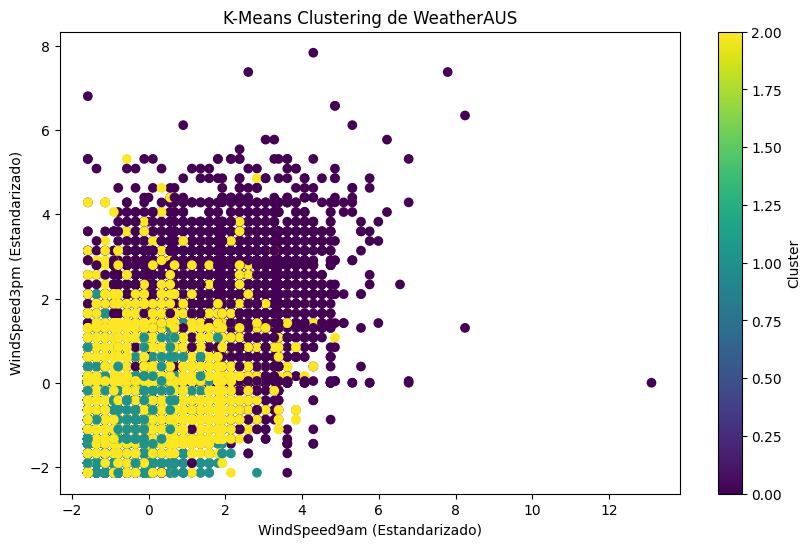

In [6]:
# Visualización de los clusters en función de la velocidad del viento
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 5], data_scaled[:, 6], c=labels, cmap='viridis')
plt.title('K-Means Clustering de WeatherAUS')
plt.xlabel('WindSpeed9am (Estandarizado)')
plt.ylabel('WindSpeed3pm (Estandarizado)')
plt.colorbar(label='Cluster')
plt.show()

## Interpretación

Podemos ver que en el gráfico existen tres clusters claramente separados:

### Cluster 1 (Verde):

* Puntos agrupados en la parte baja del gráfico (baja WindSpeed9am y baja WindSpeed3pm).
* Indica condiciones donde la velocidad del viento es consistentemente baja tanto a las 9am como a las 3pm.

### Cluster 2 (Morado):

* Puntos en la parte superior derecha del gráfico (alta WindSpeed9am y alta WindSpeed3pm).
* Indica condiciones donde la velocidad del viento es alta en ambos momentos del día.

### Cluster 3 (Amarillo):

* Puntos dispersos en el medio (media WindSpeed9am y media WindSpeed3pm).
* Indica condiciones donde la velocidad del viento es moderada en ambos momentos del día.

___

## Interpretación del Gráfico de K-Means Clustering

### Colores de los Clusters:

* Cada color en el gráfico representa un cluster diferente.
* Los puntos con el mismo color pertenecen al mismo cluster, lo que significa que tienen características similares en términos de WindSpeed9am y WindSpeed3pm.

### Ejes del Gráfico:

* El eje X representa la variable WindSpeed9am (velocidad del viento a las 9am, estandarizada).
* El eje Y representa la variable WindSpeed3pm (velocidad del viento a las 3pm, estandarizada).

### Centroides de los Clusters:

* Los centroides de los clusters son los puntos centrales de cada grupo y pueden estar marcados con un símbolo diferente (a menudo una estrella o un punto más grande).
* Los centroides son promedios de las coordenadas de todos los puntos en un cluster.
* En el gráfico, estos centroides ayudan a entender la posición media de cada cluster en el espacio de las variables.

### Distribución de los Puntos:

* Observa cómo se distribuyen los puntos alrededor de cada centroide.
* Los clusters bien definidos tendrán puntos que se agrupan estrechamente alrededor del centroide.
* Clusters más dispersos indicarán más variabilidad dentro de ese grupo.

### Relación entre Variables:
Si los puntos dentro de un cluster se alinean diagonalmente, horizontalmente o verticalmente, puede indicar una relación entre WindSpeed9am y WindSpeed3pm.
Por ejemplo, un cluster diagonal puede sugerir que la velocidad del viento a las 9am está relacionada con la velocidad del viento a las 3pm.


### Consideraciones Adicionales

* Número de Clusters (k):
    * El valor de k (número de clusters) se elige antes de aplicar el algoritmo y puede afectar significativamente los resultados.
    * Elegir el valor correcto de k es crucial y a menudo se hace utilizando métodos como el codo (elbow method) o la silueta (silhouette score).

* Estandarización de los Datos:
    * Estandarizar las variables (WindSpeed9am y WindSpeed3pm) asegura que ambas contribuyan igualmente al cálculo de la distancia en el espacio de las variables.

* Interpretación del Ruido:
    * A diferencia de DBSCAN, K-Means no identifica explícitamente el ruido, pero los puntos muy alejados del centroide de cualquier cluster pueden considerarse atípicos.


## Conclusión

Interpretar el gráfico de K-Means Clustering implica observar la distribución de los puntos en función de las variables de interés, identificar los clusters y sus centroides, y entender la relación entre las variables dentro de cada cluster. Esta interpretación puede ayudar a identificar patrones en la velocidad del viento a diferentes momentos del día y a comprender mejor las condiciones meteorológicas presentes en el conjunto de datos WeatherAUS.